In [2]:
#imports
import pytesseract
from PIL import Image
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
import nltk
from matplotlib import pyplot as plt
import cv2
import numpy as np
import mahotas
from pylab import imshow,gray,show
from os import path

<Figure size 640x480 with 0 Axes>

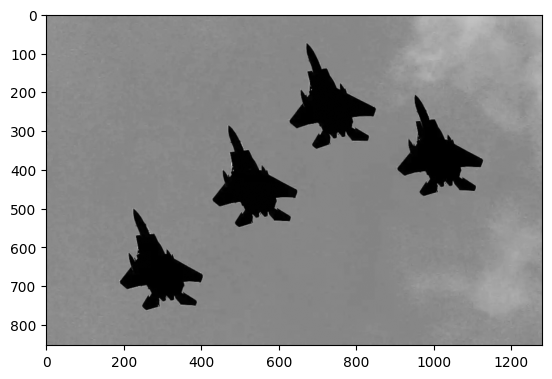

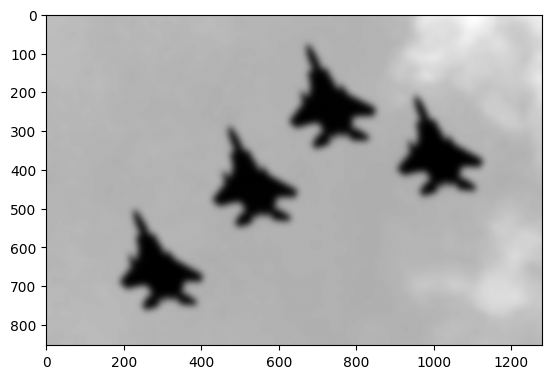

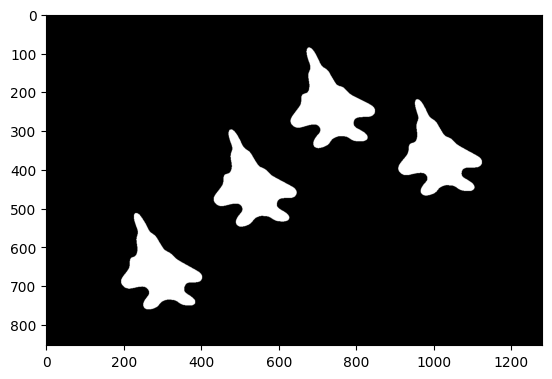

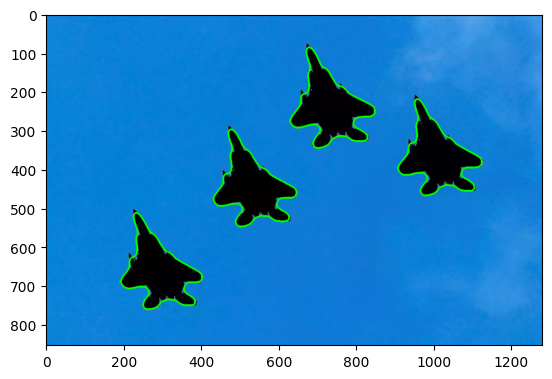

<Figure size 640x480 with 0 Axes>

In [24]:
imagem = cv2.imread('1-Avioes.webp')

# Convertendo a imagem para tons de cinza
imagemCinza = cv2.cvtColor(imagem,cv2.COLOR_BGR2GRAY)
plt.imshow(imagemCinza,cmap='gray')
plt.figure()

# Aplicando o blur
imagemBlur = cv2.GaussianBlur(imagemCinza,(55,55),0)
plt.imshow(imagemBlur,cmap='gray')
plt.figure()

T = mahotas.thresholding.otsu(imagemBlur)
binarizacao = imagemBlur.copy()
binarizacao[binarizacao > T] = 255
binarizacao[binarizacao < 255] = 0
imagemBinarizada = cv2.bitwise_not(binarizacao)
plt.imshow(imagemBinarizada,cmap='gray')
plt.figure()

# Desenhando os contornos
canny = cv2.Canny(binarizacao,70,120)
contornos = cv2.findContours(canny,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnts = contornos[0] if len(contornos) == 2 else contornos[1]

plt.imshow(cv2.cvtColor(cv2.drawContours(imagem.copy(), cnts, -1, (0, 255, 0), 3), cv2.COLOR_BGR2RGB))

plt.figure()

In [ ]:
#Optical Character Recognition

nltk.download('punkt')
nltk.download('stopwords')

#OCR
def performe_ocr(image_path):
  image = Image.open(image_path)
  text = pytesseract.image_to_string(image)
  return text

#SUMARIZA
def perform_sumarization(text):
  sentences = sent_tokenize(text)
  words = word_tokenize(text)
  stop_words = set(stopwords.words('portuguese'))
  words = [word for word in words if word.lower() not in stop_words]
  freq_dist = FreqDist(words)
  max_dist = max(freq_dist.values())

  #normaliza- como se cada palavra tivesse um peso
  for word in freq_dist.keys():
    freq_dist[word] = (freq_dist[word]/max_dist)
  #Calcule a pontuação das frases
  sentence_scores = {}
  for sent in sentences:
    for word in word_tokenize(sent.lower()):
      if word in freq_dist.keys():
        if len(sent.split(' ')) < 30:
          if sent not in sentence_scores.keys():
            sentence_scores[sent] = freq_dist[word]
          else:
            sentence_scores[sent] += freq_dist[word]

  sumarized_sentences = sorted(sentence_scores,key=sentence_scores.get,reverse=True)[0:3]
  sumary = ' '.join(sumarized_sentences)

  # pega as 3 frases mais importantes e retorna
  return sumarized_sentences

image_path = "TheRaven.png"

print("executando ocr")
ocr_text = performe_ocr(image_path)
print(ocr_text)

print("executando sumarização")
sumarized_sentences = perform_sumarization(ocr_text)
print(sumarized_sentences)

executando ocr


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.